# 6 Sourcing & Analyzing Time-Series Data for wheelchairs

## This script contains the following:

### 1. Importing your libraries and data

### 2. General Time Series Data analysis
#### Subsetting, wrangling, and cleaning time-series data
#### Ploting the data using matplotlib

### 3. Adjusted Time Series Data analysis
#### Subsetting, wrangling, and cleaning time-series data
#### Ploting the data using matplotlib

### 4. Time series analysis: decomposition
### 5. Testing for stationarity
### 6. Stationarizing the Data

### 1. Importing your libraries and data

In [1]:
conda install quandl

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

In [3]:
quandl.ApiConfig.api_key = 'xJJbAfwjRizNR9wSNh-p'

In [4]:
#Importing Data
path = r'/Users/marialuciaguarita/Phyton Careerfoundry Project 2'
Data_wp = pd.read_csv(os.path.join(path,'Wheelchair prices.csv'), index_col = False)

In [5]:
path = r'/Users/marialuciaguarita/Phyton Careerfoundry Project 2'
Data_wap = pd.read_csv(os.path.join(path,'Walker prices.csv'), index_col = False)

In [6]:
path = r'/Users/marialuciaguarita/Phyton Careerfoundry Project 2'
Data_cp = pd.read_csv(os.path.join(path,'Cructhes prices.csv'), index_col = False)

### 2. General Time Series Data analysis 

### 2.a Wheelchair

#### Subsetting, wrangling, and cleaning time-series data

In [7]:
Data_wp.shape

(1793, 3)

In [8]:
#Changing columns name form "Data short version"
Data_wp = Data_wp.rename(columns = {'Unnamed: 0' : 'D'})

In [9]:
Data_wp.head(5)

,D,New,Used
0,2018-05-05,110.0,104.0
1,2018-05-06,112.0,103.0
2,2018-05-07,110.0,102.0
3,2018-05-08,114.0,101.0
4,2018-05-09,110.0,100.0


#### Plot the data using matplotlib.

In [10]:
# Set the "Date" column as the index

from datetime import datetime

Data_wp['datetime'] = pd.to_datetime(Data_wp['D']) # Create a datetime column from "Date.""
Data_wp = Data_wp.set_index('datetime') # Set the datetime as the index of the dataframe.
Data_wp.drop(['D'], axis=1, inplace=True) # Drop the "Date" column.
Data_wp.head()

,New,Used
datetime,,
2018-05-05,110.0,104.0
2018-05-06,112.0,103.0
2018-05-07,110.0,102.0
2018-05-08,114.0,101.0
2018-05-09,110.0,100.0


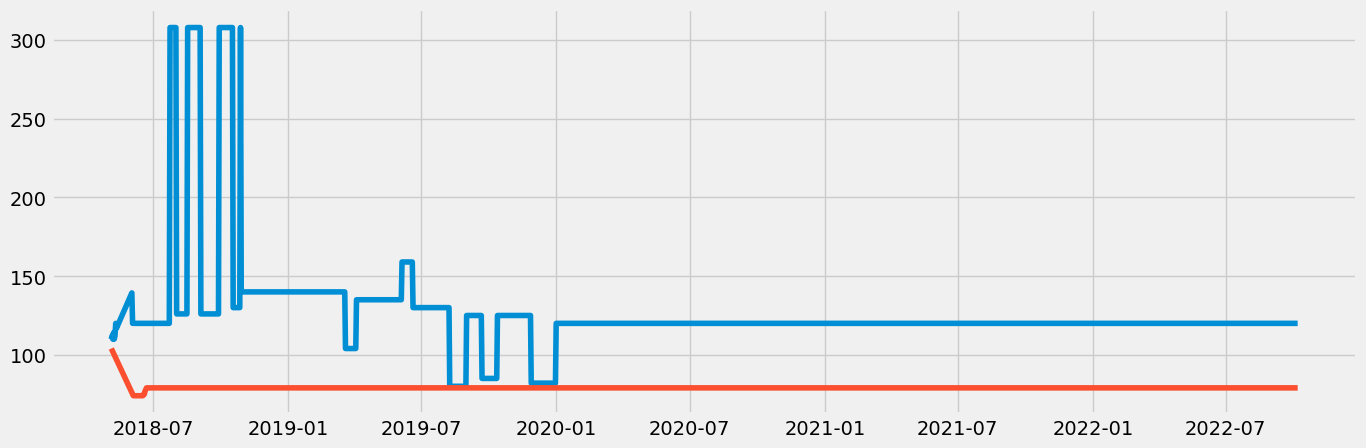

In [11]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(Data_wp)

### 2.b Walker

#### Subsetting, wrangling, and cleaning time-series data

In [12]:
Data_wap.shape

(1617, 3)

In [13]:
#Changing columns name form "Data short version"
Data_wap = Data_wap.rename(columns = {'Unnamed: 0' : 'D'})

In [14]:
Data_wap.head(5)

,D,New,Used
0,2018-05-05,20.75,13.45
1,2018-05-06,21.13,13.83
2,2018-05-07,20.75,13.45
3,2018-05-08,21.51,14.21
4,2018-05-09,20.75,13.45


#### Plot the data using matplotlib.

In [15]:
# Set the "Date" column as the index

from datetime import datetime

Data_wap['datetime'] = pd.to_datetime(Data_wap['D']) # Create a datetime column from "Date.""
Data_wap = Data_wap.set_index('datetime') # Set the datetime as the index of the dataframe.
Data_wap.drop(['D'], axis=1, inplace=True) # Drop the "Date" column.
Data_wap.head()

,New,Used
datetime,,
2018-05-05,20.75,13.45
2018-05-06,21.13,13.83
2018-05-07,20.75,13.45
2018-05-08,21.51,14.21
2018-05-09,20.75,13.45


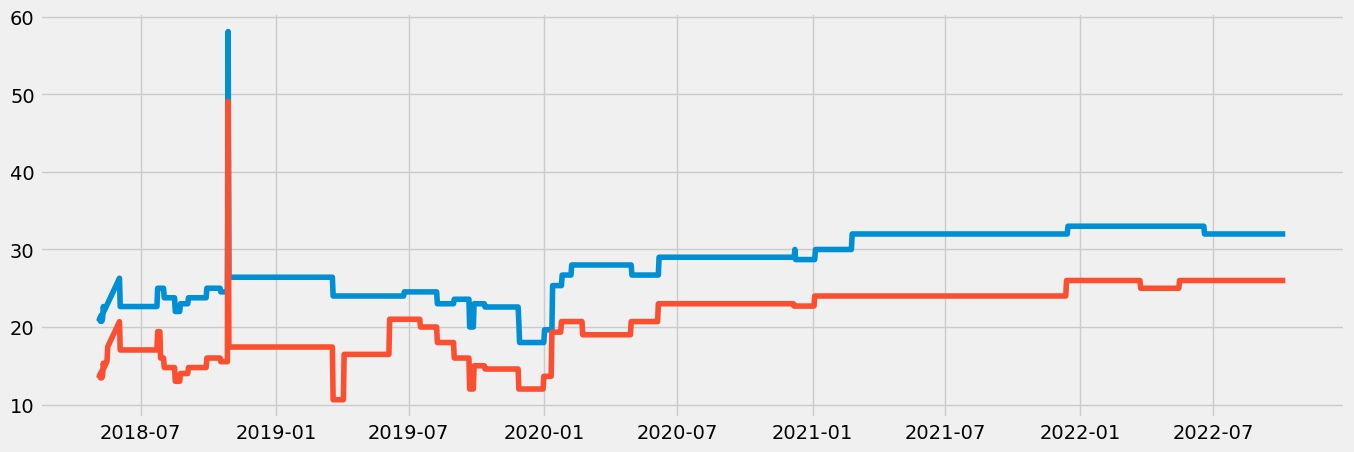

In [16]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(Data_wap)

### 2.c Crutches

#### Subsetting, wrangling, and cleaning time-series data

In [17]:
Data_cp.shape

(1617, 3)

In [18]:
#Changing columns name form "Data short version"
Data_cp = Data_cp.rename(columns = {'Unnamed: 0' : 'D'})

In [19]:
Data_cp.head(5)

,D,New,Used
0,2018-05-05,17.75,10.95
1,2018-05-06,18.13,11.33
2,2018-05-07,17.75,10.95
3,2018-05-08,18.51,11.71
4,2018-05-09,17.75,10.95


#### Plot the data using matplotlib.

In [20]:
# Set the "Date" column as the index

from datetime import datetime

Data_cp['datetime'] = pd.to_datetime(Data_cp['D']) # Create a datetime column from "Date.""
Data_cp = Data_cp.set_index('datetime') # Set the datetime as the index of the dataframe.
Data_cp.drop(['D'], axis=1, inplace=True) # Drop the "Date" column.
Data_cp.head()

,New,Used
datetime,,
2018-05-05,17.75,10.95
2018-05-06,18.13,11.33
2018-05-07,17.75,10.95
2018-05-08,18.51,11.71
2018-05-09,17.75,10.95


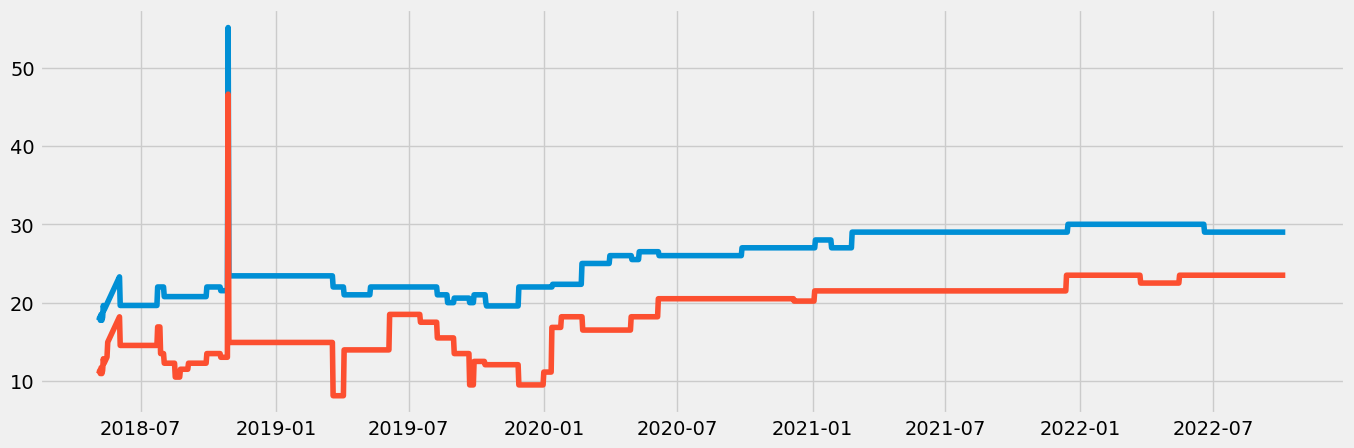

In [21]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(Data_cp)

### 3. Adjusted Time Series Data analysis

### 3.a Wheelchair

#### Subsetting, wrangling, and cleaning time-series data

In [22]:
# Reset index to use the "Date" column as a filter

Data_wp = Data_wp.reset_index()

In [23]:
Data_wp.head()

,datetime,New,Used
0,2018-05-05,110.0,104.0
1,2018-05-06,112.0,103.0
2,2018-05-07,110.0,102.0
3,2018-05-08,114.0,101.0
4,2018-05-09,110.0,100.0


In [24]:
Data_wpsub = Data_wp.loc[(Data_wp['datetime'] >= '2019-01-01') & (Data_wp['datetime'] < '2021-12-24')]

In [25]:
Data_wpsub.shape

(1088, 3)

In [26]:
# Choosing columns
Data_wpnsub = Data_wpsub [['datetime','New']] 

In [27]:
Data_wpnsub.head()

,datetime,New
241,2019-01-01,140.0
242,2019-01-02,140.0
243,2019-01-03,140.0
244,2019-01-04,140.0
245,2019-01-05,140.0


I chose this subsetting because it is the period in which I am studying my sample from ELSI-Brazil Dataframe. From 2019-2020.

In [28]:
# Set the "Date" column as the index

from datetime import datetime

Data_wpnsub['Date'] = pd.to_datetime(Data_wpnsub['datetime']) 
Data_wpnsub = Data_wpnsub.set_index('Date') 
Data_wpnsub.drop(['datetime'], axis=1, inplace=True) 
Data_wpnsub.head()

,New
Date,
2019-01-01,140.0
2019-01-02,140.0
2019-01-03,140.0
2019-01-04,140.0
2019-01-05,140.0


#### Ploting the data using matplotlib

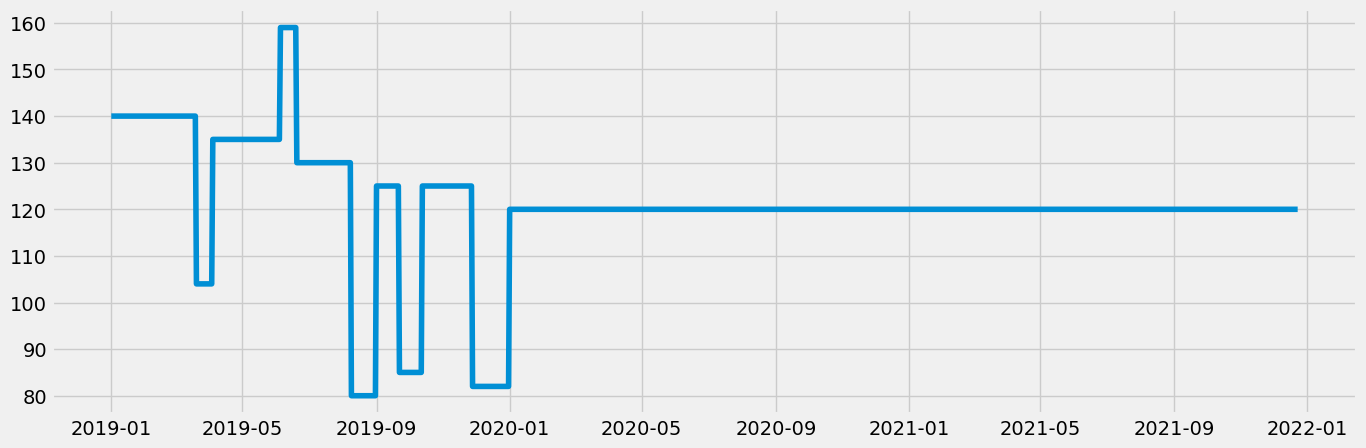

In [29]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(Data_wpnsub)

In [30]:
# Check for missing values 

Data_wpnsub.isnull().sum() 

New    0
dtype: int64

### 3.b Walker

#### Subsetting, wrangling, and cleaning time-series data

In [31]:
# Reset index to use the "Date" column as a filter

Data_wap = Data_wap.reset_index()

In [32]:
Data_wap.head()

,datetime,New,Used
0,2018-05-05,20.75,13.45
1,2018-05-06,21.13,13.83
2,2018-05-07,20.75,13.45
3,2018-05-08,21.51,14.21
4,2018-05-09,20.75,13.45


In [33]:
Data_wapsub = Data_wap.loc[(Data_wp['datetime'] >= '2019-01-01') & (Data_wap['datetime'] < '2021-12-24')]

In [34]:
Data_wapsub.shape

(1088, 3)

In [35]:
# Choosing columns
Data_wapnsub = Data_wapsub [['datetime','New']] 

In [36]:
Data_wapnsub.head()

,datetime,New
241,2019-01-01,26.42
242,2019-01-02,26.42
243,2019-01-03,26.42
244,2019-01-04,26.42
245,2019-01-05,26.42


In [37]:
# Set the "Date" column as the index

from datetime import datetime

Data_wapnsub['Date'] = pd.to_datetime(Data_wapnsub['datetime']) 
Data_wapnsub = Data_wapnsub.set_index('Date') 
Data_wapnsub.drop(['datetime'], axis=1, inplace=True) 
Data_wapnsub.head()

,New
Date,
2019-01-01,26.42
2019-01-02,26.42
2019-01-03,26.42
2019-01-04,26.42
2019-01-05,26.42


#### Ploting the data using matplotlib

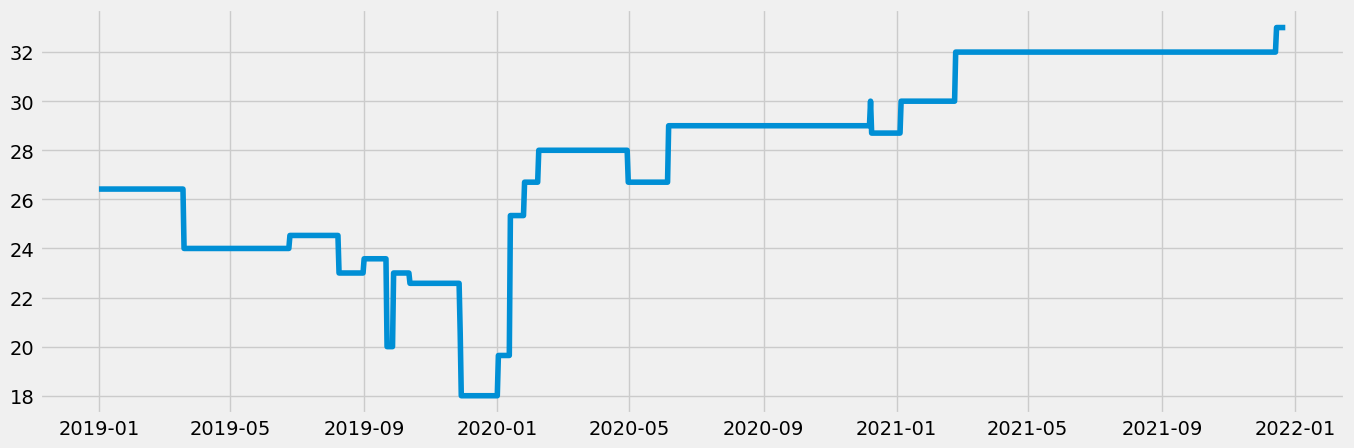

In [38]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(Data_wapnsub)

In [39]:
# Check for missing values 

Data_wapnsub.isnull().sum() 

New    0
dtype: int64

### 3.c Crutches

#### Subsetting, wrangling, and cleaning time-series data

In [40]:
# Reset index to use the "Date" column as a filter

Data_cp = Data_cp.reset_index()

In [41]:
Data_cp.head()

,datetime,New,Used
0,2018-05-05,17.75,10.95
1,2018-05-06,18.13,11.33
2,2018-05-07,17.75,10.95
3,2018-05-08,18.51,11.71
4,2018-05-09,17.75,10.95


In [42]:
Data_cpsub = Data_cp.loc[(Data_cp['datetime'] >= '2019-01-01') & (Data_cp['datetime'] < '2021-12-24')]

In [43]:
Data_cpsub.shape

(1088, 3)

In [44]:
# Choosing columns
Data_cpnsub = Data_cpsub [['datetime','New']] 

In [45]:
Data_cpnsub.head()

,datetime,New
241,2019-01-01,23.42
242,2019-01-02,23.42
243,2019-01-03,23.42
244,2019-01-04,23.42
245,2019-01-05,23.42


In [46]:
# Set the "Date" column as the index

from datetime import datetime

Data_cpnsub['Date'] = pd.to_datetime(Data_cpnsub['datetime']) 
Data_cpnsub = Data_cpnsub.set_index('Date') 
Data_cpnsub.drop(['datetime'], axis=1, inplace=True) 
Data_cpnsub.head()

,New
Date,
2019-01-01,23.42
2019-01-02,23.42
2019-01-03,23.42
2019-01-04,23.42
2019-01-05,23.42


#### Ploting the data using matplotlib

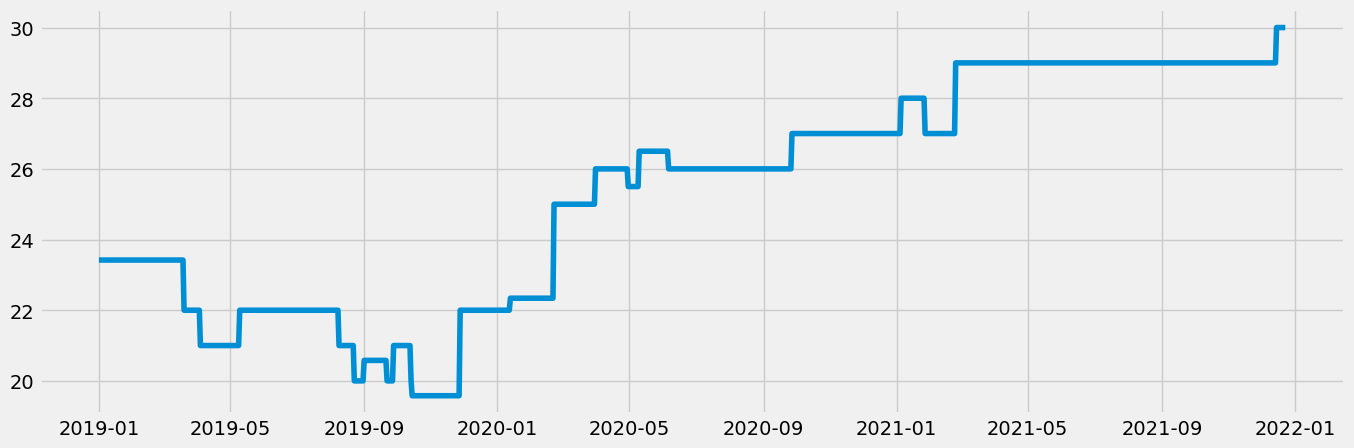

In [47]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(Data_cpnsub)

In [48]:
# Check for missing values 

Data_cpnsub.isnull().sum() 

New    0
dtype: int64

### 4. Time-series analysis: decomposition

In [49]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(Data_wpnsub, model='additive')

In [50]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

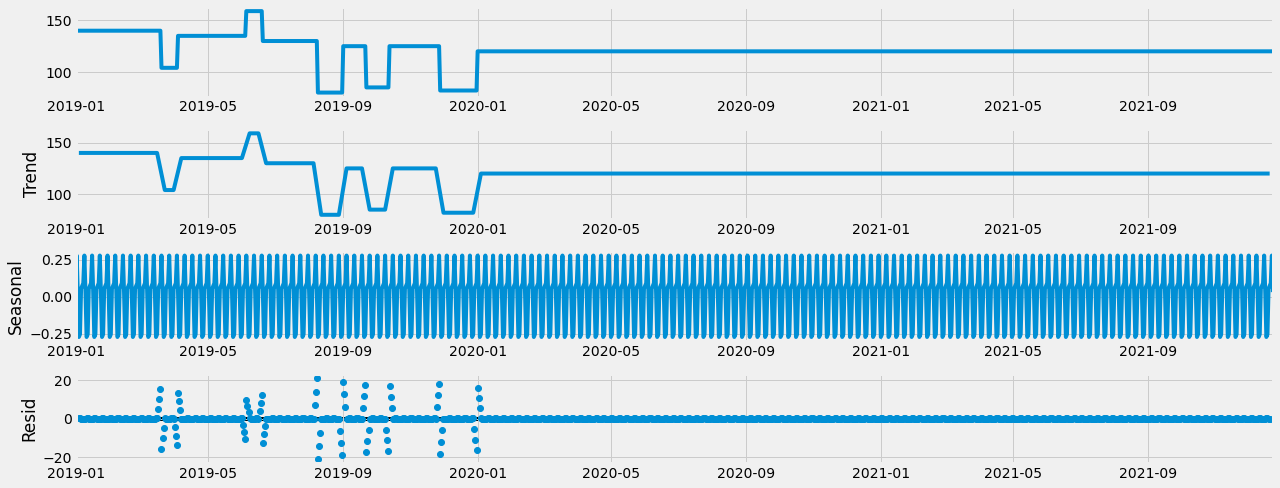

In [51]:
# Plot the separate components

decomposition.plot()
plt.show()

Decomposition analysis

The first chart in the figure above is the data itself.
The second is the underlying trend - because the data that has little noise the level and trend appear slightly different. There are some fluctuations that are not observed in 2020, possibly due to the entry of the Covid-19 Pandemic with the decrease in the purchase of chairs, although some people had Covid-19 sequelae, but they should not leave their homes.
The third component is the seasonality. There are seasonal fluctuations represented by a spikey curve that changes at a regular interval.
With the fourth line we can observe some occasional "noises", but without much explanation, maybe lightning-fast promotions like Black Friday, despite not being restricted to the month of November.


### 5. Testing for stationarity

In [52]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(Data_wpnsub['New'])

Dickey-Fuller Stationarity test:
Test Statistic                   -4.297422
p-value                           0.000449
Number of Lags Used              21.000000
Number of Observations Used    1066.000000
Critical Value (1%)              -3.436499
Critical Value (5%)              -2.864255
Critical Value (10%)             -2.568216
dtype: float64


Data non-stationary

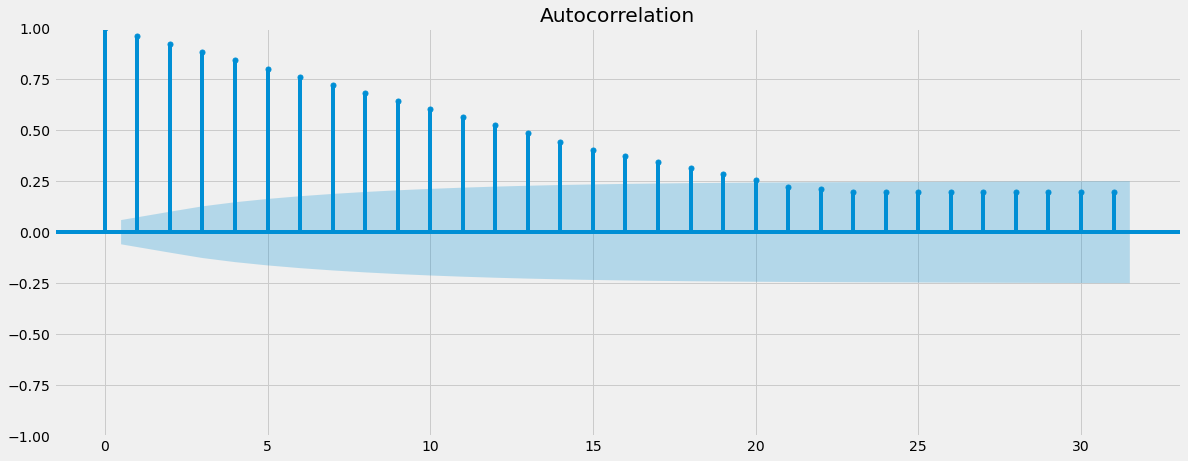

In [53]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(Data_wpnsub)
plt.show()

Data non-stationary

### 6. Stationarizing the Data

In [54]:
data_diff = Data_wpnsub - Data_wpnsub.shift(1)

In [55]:
data_diff.dropna(inplace = True) 

In [56]:
data_diff.head()

,New
Date,
2019-01-02,0.0
2019-01-03,0.0
2019-01-04,0.0
2019-01-05,0.0
2019-01-06,0.0


In [57]:
data_diff.columns

Index(['New'], dtype='object')

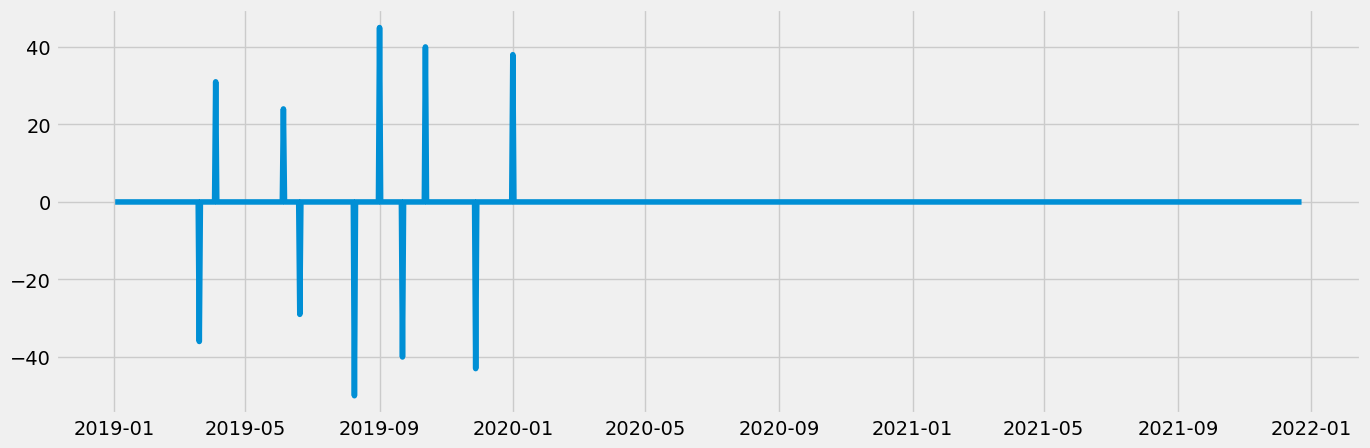

In [58]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [59]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.057758e+01
p-value                        7.040475e-19
Number of Lags Used            2.200000e+01
Number of Observations Used    1.064000e+03
Critical Value (1%)           -3.436511e+00
Critical Value (5%)           -2.864260e+00
Critical Value (10%)          -2.568218e+00
dtype: float64


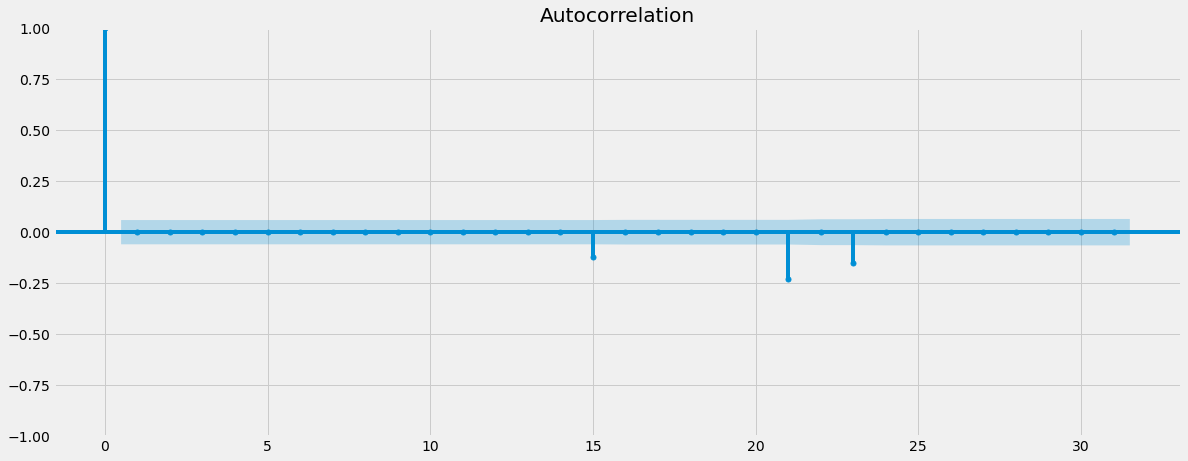

In [60]:
plot_acf(data_diff)
plt.show()

I couldn't understand this chart. Why has blue edde declined so much? Is it because the prices on the table have the same value for several months at times?